# Task 1

We want to implement the epsilon greedy algorithm. The purpose of the algorithm is to balance exploration with exploitation.

Epsilon greedy will pick the best option except for epsilon times every 100 trials.

In this task we want to empiricaly find out which one is the best lever to pull.

Each lever has a specific probability to release a prize, which is distributed accordingly to the normal distribution.

Please complete the epsilon greedy function.


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
# Multi-armed bandits definitions
nb_bandits = 3  # Number of bandits
# We set the probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.60]

def pull(i):
    """
    Pull arm of the bandit i
    return 1 if win, otherwise 0.
    """
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
# The iterations where we want to plot the results
iterations_to_plot = [1, 10, 50, 100, 500, 10000]

In [6]:
# 
def epsilon_greedy(q, epsilon=0.2):
    """
    The epsilon greedy functions that returns a random choice
    with a probability equal to epsilon, and the best choice
    the rest of the time.
    """
    a = np.argmax(q)
    if np.random.rand() < epsilon:
        a = np.random.randint(len(q))
    return a

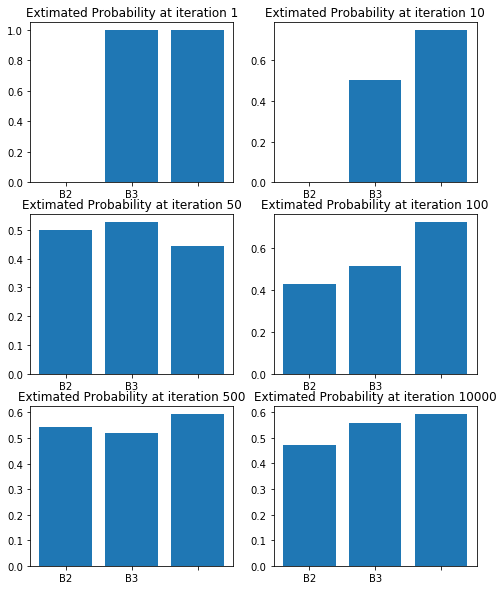

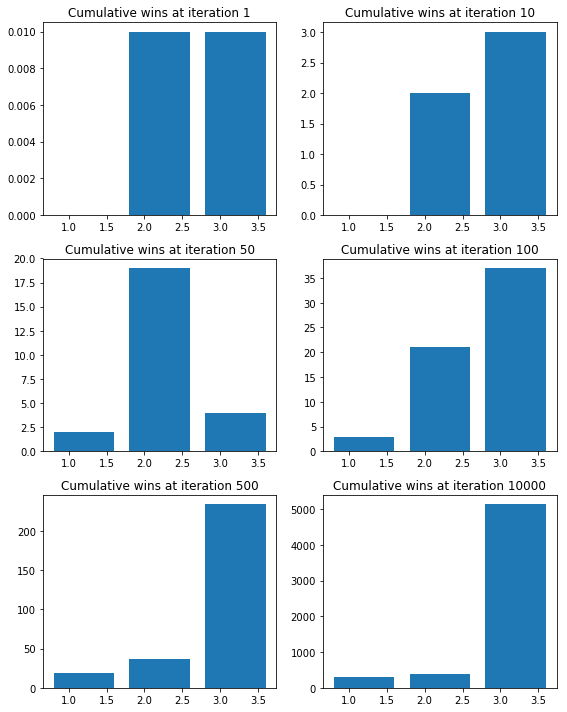

In [4]:

# Run the trail for `n` iteration
def run_simulation(n_iterations, iterations_to_plot, epsilon=0.2):

    # Setup plot
    fig1, axs1 = plt.subplots(3, 2, figsize=(8, 10))
    axs1 = axs1.flat
    fig2, axs2 = plt.subplots(3, 2, figsize=(8, 10))
    axs2 = axs2.flat

    # The number of trials and wins will represent the prior for each
    #  bandit with the help of the Beta distribution.
    trials = [0, 0.01, 0.01]  # Number of times we tried each bandit
    wins = [0, 0.01, 0.01]  # Number of wins for each bandit
    
    for iteration in range(1, n_iterations+1):
        # Define the prior based on current observations
        try:
            results = [w/t for w,t in zip(wins, trials)]
        except ZeroDivisionError as e:
            # If we don't have any trials we just put 0 
            results = [w/t if t else 0 for w,t in zip(wins, trials)]
        if iteration in iterations_to_plot:
            ax1 = next(axs1)
            ax1.set_xticklabels(('B1', 'B2', 'B3'))
            ax1.bar([1, 2, 3], results)
            ax1.set_title(f'Extimated Probability at iteration {iteration:d}')
            ax2 = next(axs2)
            ax2.bar([1.2, 2.2, 3.2], wins)
#             ax2.set_ylabel('Cumulative wins', color='r')
            ax2.set_title(f'Cumulative wins at iteration {iteration:d}')

        # Use epsilon greedy to choose a bandit
        chosen_bandit = epsilon_greedy(results, epsilon)
        # Pull the bandit
        x = pull(chosen_bandit)
        # Update trials and wins (defines the posterior)
        trials[chosen_bandit] += 1
        wins[chosen_bandit] += x

    plt.tight_layout()
    plt.show()
    
    
run_simulation(n_iterations=10_000, iterations_to_plot=iterations_to_plot)

# Task 2

In a Reinforcement Learning we want to balance exploration and exploitation.

To achieve this using our to MAB algorithm we want to decrease the number of random choices the more sure we are about our decision.

To achieve this we can use gradually decrease epsilon as we are gaining more confidence on the estimated payout of each bandit.

For this exercise please adapt the function run_simulation_decay After completing the task please try different values for epsilon and epsilon_decay.

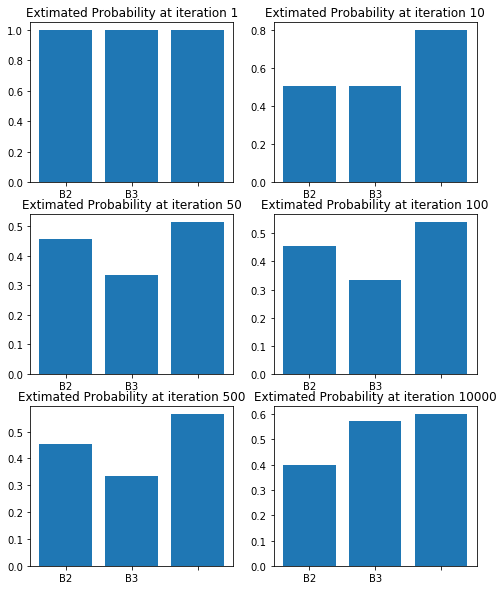

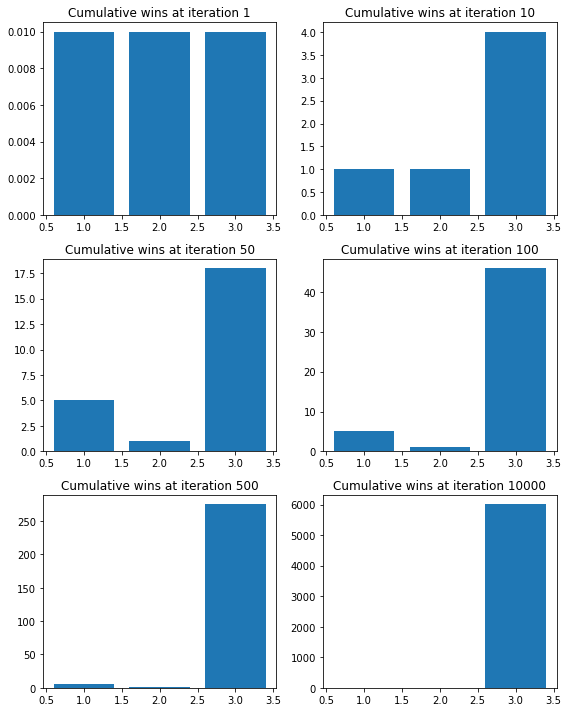

In [5]:
# Run the trail for `n` iteration
def run_simulation(n_iterations, iterations_to_plot, epsilon=0.2, decay=0.01):

    # Setup plot
    fig1, axs1 = plt.subplots(3, 2, figsize=(8, 10))
    axs1 = axs1.flat
    fig2, axs2 = plt.subplots(3, 2, figsize=(8, 10))
    axs2 = axs2.flat

    # The number of trials and wins will represent the prior for each
    #  bandit with the help of the Beta distribution.
    trials = [0.01, 0.01, 0.01]  # Number of times we tried each bandit
    wins = [0.01, 0.01, 0.01]  # Number of wins for each bandit
    
    for iteration in range(1, n_iterations+1):
        # Define the prior based on current observations
        results = [w/t for w,t in zip(wins, trials)]
        if iteration in iterations_to_plot:
            ax1 = next(axs1)
            ax1.set_xticklabels(('B1', 'B2', 'B3'))
            ax1.bar([1, 2, 3], results)
            ax1.set_title(f'Extimated Probability at iteration {iteration:d}')
            ax2 = next(axs2)
            ax2.bar([1, 2, 3], wins)
#             ax2.set_ylabel('Cumulative wins', color='r')
            ax2.set_title(f'Cumulative wins at iteration {iteration:d}')

        # Use epsilon greedy to choose a bandit
        chosen_bandit = epsilon_greedy(results, epsilon*decay)
        # Pull the bandit
        x = pull(chosen_bandit)
        # Update trials and wins (defines the posterior)
        trials[chosen_bandit] += 1
        wins[chosen_bandit] += x

    plt.tight_layout()
    plt.show()
    
run_simulation(n_iterations=10_000, iterations_to_plot=iterations_to_plot)